
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: JC Abrahamson

***

This assignment is due on Canvas by **11:59 PM on Friday February 14**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***


### [20 points] Problem 1

To play a game, you have a box containing 20 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 15 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 5 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand (and LaTeX your solutions) unless otherwise stated (but don't be afraid to simulate to check your result!).

**Part A**: You roll your die one time.  What is the probability of the event $R_6$, that you roll a 6?  Include at least 4 decimal places in your final answer.

**Solution**: 0.0688


**Part B**: Suppose you roll a 6.  What is the probability that the die you chose from the box is a Six-sided die? 

**Solution**: 0.9091


**Part C:**  Are the events $R_6$ and $S$ independent?  Justify your answer **using math**.

**Solution:** No  ...   
P(R6 | S) = .9091
P(R6) = .0688
P(R6) != P(R6 | S)

**Part D:** Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$. 

**Solution:** 0.6452


**Part E**:  First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define and code a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** when $n=1$.

**Solution**:


In [4]:
def prob_four(n):
    numerator = (1 * (20/40))
    denom = (1*20/40 + (4/6)**n *15/40 + (4/20)**n *5/40 )
    return (numerator/denom)
print (prob_four(1))

0.6451612903225806


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-90% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [5]:
for i in range(0,15):
    print (i,prob_four(i))

0 0.5
1 0.6451612903225806
2 0.7444168734491315
3 0.8168451624614268
4 0.8706644136881345
5 0.910046100014291
6 0.9382098542088295
7 0.9579471291733732
8 0.9715675877904393
9 0.9808639820993544
10 0.987160815616865
11 0.9914037658915739
12 0.9942527112697579
13 0.9961611202697314
14 0.9974374678572165


**Solution:** 5

***


### [20 points] Problem 2

Stella is very excited to have secured a professorship in the Computer Science department here at CU. She works hard, but has a problem finding her way around Boulder after leaving work. When she leaves work from the CU Engineering Center (E-Center), she must randomly choose a location on the map below and go there.   

Here are some rules governing her movements throughout the fair city of Boulder:
* When Stella is leaving one location, she randomly selects one of the available paths (denoted by arrows on the map), with equal probability, and goes to her next location.
* This includes back-tracking (when the arrows point in both directions). E.g. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Note that the path from the Library to her Home is a one way path. Once she goes home, she does not return to the library, or any other location on the map. She stays at home. 
* Assume that all moves require the same amount of time.
* She cannot stay in one location, except for when she goes home. If she is not at her house, she must always move to another adjacent location.
* A "stop" is moving from one location to another. E.g. If Stella moves from the E-Center to the Library and then moves from the Library to the Gym, this is two "stops". 

<div>
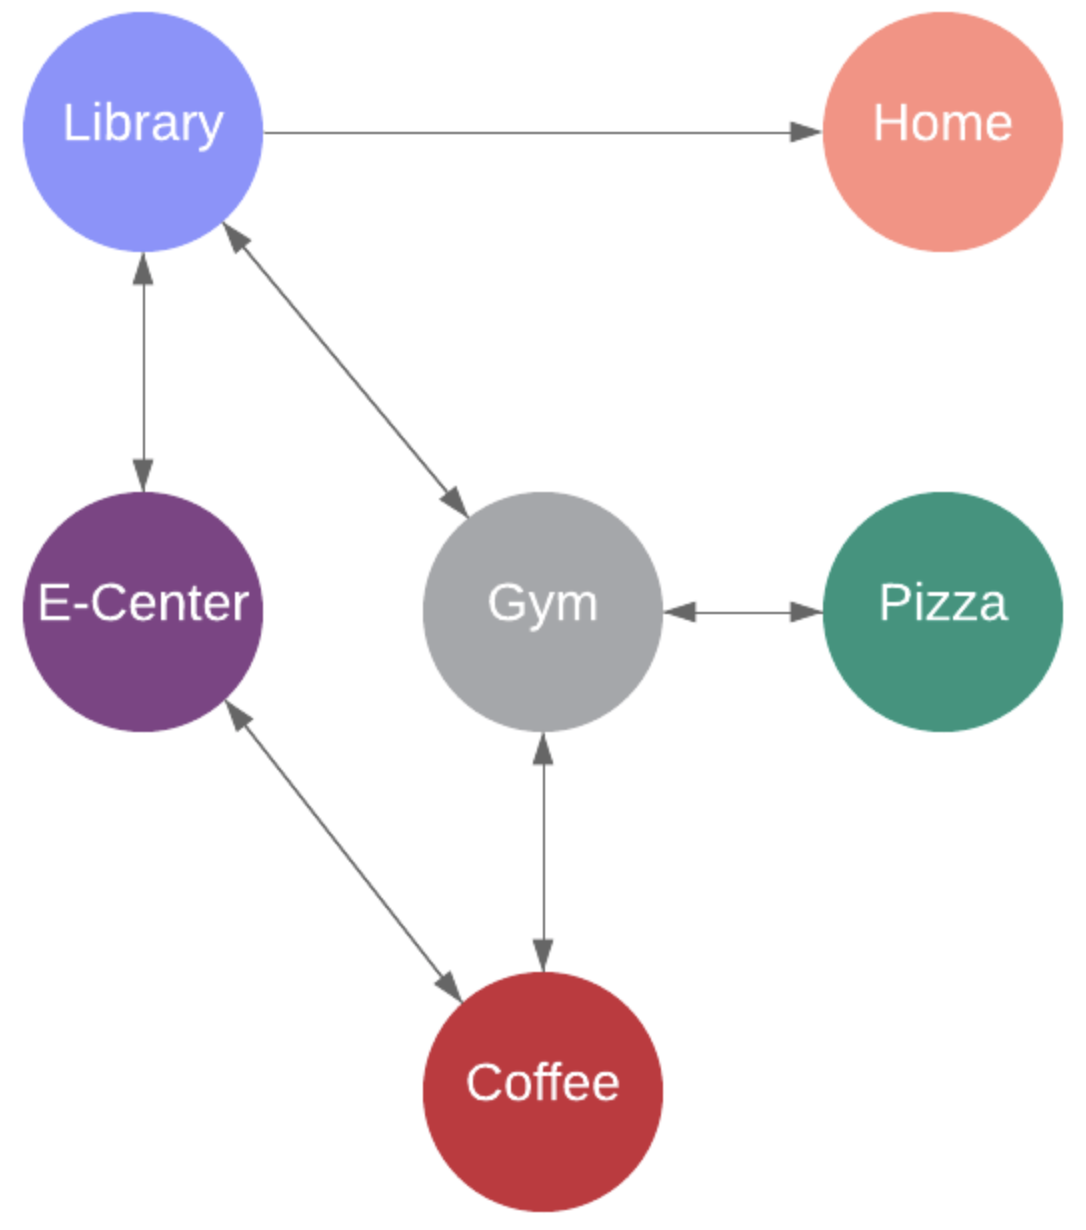
</div>

**Part A**: Stella is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, she wants to go to the Coffee Shop (Coffee) to grab a coffee.  

Compute the probability that Stella goes to the Coffee shop at least once in either in her first, second, or third stop after leaving from the E Center. **Calculate this by hand, showing your work in a markdown cell. You may leave answers as fractions or decimals. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**
(1/2)+{(1/2)(1/3)(1/3)}+{(1/2)(1/3)(1/2)} = .6389

**Part B**: What is the probability that Stella gets to her house in exactly 2 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:** (1/2)*(1/3) = (1/6)

**Part C:** What is the probability that Stella gets to her house in exactly 3 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:** 0 (no possible path)

**Part D:** What is the probability that Stella gets to her house in exactly 4 stops after leaving the E-Center? What is the probability that she gets to her house in 4 or less stops? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:** =4: {(1/2)*(1/2)*(1/3)*(1/3)}+
{(1/2)*(1/2)*(1/2)*(1/3)}+
{(1/2)*(1/3)*(1/3)*(1/3)}+
{(1/2)*(1/3)*(1/2)*(1/3)} = 0.1157

<=4:
{(1/2)*(1/2)*(1/3)*(1/3)}+
{(1/2)*(1/2)*(1/2)*(1/3)}+
{(1/2)*(1/3)*(1/3)*(1/3)}+
{(1/2)*(1/3)*(1/2)*(1/3)}+
{(1/2)*(1/3)} = 0.2824


**Part E:** Write a Python simulation to confirm that your by-hand calculations in **Part B**, **Part C**, and **Part D** are correct. Don't worry about simulating **Part A**. Your simulation code should simulate Stella's movement after leaving the E-Center and end when she reaches home. You should run the simulation at least 2000 times and record how many stops it took Stella to get home on each run (in an array... don't print 2000 results). Then use that array to print the simulated probability of reaching home in 2 stops, 3 stops, 4 stops, and 4 or less stops. ***Then summarize your results in a markdown cell***.

***Make sure to either comment your code, write exteremely readable code, or use a markdown cell to explain what your code does. Code that isn't immediately understandable with no additional explanation will lose you credit.***

**Solution:**


In [8]:
def B():
    pos = ['E', 'H', 'C', 'G', 'P', 'L']
    firstPoint = 'E'
    nextPoint = ['C','L']
    k = np.random.choice(nextPoint)
    if k == 'C':
        nextPoint = ['G','E']
        ke = np.random.choice(nextPoint)
        if ke == 'G':
            return False
        else:
            return False
    if k == 'L':
        nextPoint = ['H','G','E']
        ke = np.random.choice(nextPoint)
        if ke == 'H':
            return True
        else:
            return False

def rB():
    win = np.sum([B() for i in range(0,100000)])
    print ("Prob = {}" .format(win/100000))
rB()

Prob = 0.16771


In [9]:
def C():
    pos = ['E', 'H', 'C', 'G', 'P', 'L']
    firstPoint = 'E'
    nextPoint = ['C','L']
    k = np.random.choice(nextPoint)
    if k == 'C':
        nextPoint = ['E','G']
        ke = np.random.choice(nextPoint)
        if ke == 'G':
            nextPoint = ['P','L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                return False
            elif ke == 'P':
                return False
            else:
                return False
        else:
            nextPoint = ['L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                return False
            else:
                return False
    if k == 'L':
        nextPoint = ['H','G','E']
        ke = np.random.choice(nextPoint)
        if ke == 'H':
            return False
        elif ke == 'G':
            return False
        else:
            return False

def rC():
    win = np.sum([C() for i in range(0,100000)])
    print ("Prob = {}" .format(win/100000))
rC()

Prob = 0.0


In [18]:
def Da():
    pos = ['E', 'H', 'C', 'G', 'P', 'L']
    firstPoint = 'E'
    nextPoint = ['C','L']
    k = np.random.choice(nextPoint)
    if k == 'C':
        nextPoint = ['E','G']
        ke = np.random.choice(nextPoint)
        if ke == 'G':
            nextPoint = ['P','L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        else:
            nextPoint = ['L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
    if k == 'L':
        nextPoint = ['H','G','E']
        ke = np.random.choice(nextPoint)
        if ke == 'E':
            nextPoint = ['L', 'C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        elif ke == 'G':
            nextPoint = ['L', 'P', 'C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        else:
            return False

def rDa():
    win = np.sum([Da() for i in range(0,100000)])
    print ("Prob Exactly 4 = {}" .format(win/100000))
rDa()

Prob Exactly 4 = 0.1157


In [11]:
def Db():
    pos = ['E', 'H', 'C', 'G', 'P', 'L']
    firstPoint = 'E'
    nextPoint = ['C','L']
    k = np.random.choice(nextPoint)
    if k == 'C':
        nextPoint = ['E','G']
        ke = np.random.choice(nextPoint)
        if ke == 'G':
            nextPoint = ['P','L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        else:
            nextPoint = ['L','C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
    if k == 'L':
        nextPoint = ['H','G','E']
        ke = np.random.choice(nextPoint)
        if ke == 'E':
            nextPoint = ['L', 'C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        elif ke == 'G':
            nextPoint = ['L', 'P', 'C']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                nextPoint = ['E','G','H']
                ke = np.random.choice(nextPoint)
                if ke == 'H':
                    return True
                else:
                    return False
            else:
                return False
        else:
            return True #H

def rDb():
    win = np.sum([Db() for i in range(0,100000)])
    print ("Prob 4 or under = {}" .format(win/100000))
rDb()

Prob 4 or under = 0.28181


**Part F:** Make a frequency histogram of the number of stops it takes Stella to get home. Use a bin size of 1 and make sure to include all the data in the histogram (e.g. don't accidentally exclude data from your simulation by making too few bins). To make the graph more legible, make it a "bar" histogram with black edges. Look up the "histtype" and "ec" arguments to the histogram function in Matplotlib if you don't know how to do this. To further our goal of having this data look nice, make the figure 15 inches wide and 8 inches tall. Look up the "figsize" argument in Matplotlib if you don't know how to do this. Remember to include axis labels and a title. Make the graph nice and readable. Use the plt.show() function to avoid printing out extraneous information.

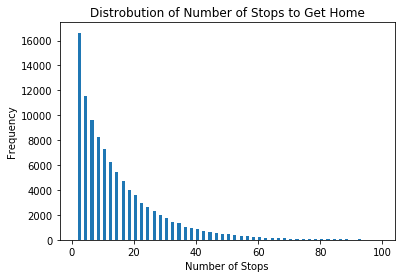

In [53]:
import matplotlib.pyplot as plt
def D_help(var):
    E = ['C','L']
    L = ['E','G','H']
    G = ['P','L','C']
    C = ['E','G']
    P = ['G']
    if var == 'E':
        return np.random.choice(E)
    elif var == 'L':
        return np.random.choice(L)
    elif var == 'G':
        return np.random.choice(G)
    elif var == 'C':
        return np.random.choice(C)
    else:
        return 'G' #P
        

def Db():
    pos = ['E', 'H', 'C', 'G', 'P', 'L']
    k = 'E'
    count = 0
    while k!= 'H':
        k = D_help(k)
        count = count + 1
    return count
    

def rDb():
    arr = []
    arr = ([Db() for i in range(0,100000)])
    r = range(1,100,1)
    plt.hist(arr, bins=r)
    plt.xlabel('Number of Stops')
    plt.ylabel('Frequency')
    plt.title('Distrobution of Number of Stops to Get Home')
rDb()

**Part G:** Did you find it easier to calculate the probabilities by hand or simulate them with Python? What are some of the pro's and con's of simulating the probabilities versus calculating them by hand. Do you think it would be feasible to calculate the probabilities by hand for a graph that was much larger (eg. 100 Locations and 500 Paths)?

**Solution:** It was a lot easier to calculate using python. With really small graphs it is very easy to calculate path probabilities by hand but as the graphs grow and their exists more and more possible paths, it begins be really hard to calculate by hand. Python functions allow fo quick calculations on any size graph.

***


### [20 points] Problem 3  

As part of the Computer Science Jedi training, John and Tom will be having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* In each round John tries to strike Tom, then Tom tries to strike John.
* If John manages to strike Tom, then John is awarded a point, and similarly if Tom manages to strike John, then Tom is awarded a point.
* If a round ends in a tie, then John and Tom proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $J$ be the event that "John wins the duel", $F$ be the event that "the duel finishes after the first round of lightsaber strikes", and $G$ be the event that "the duel goes on after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes. Furthermore, John successfully lands his lightsaber strikes with probability $p$, and Tom lands his strikes with probability $q$.

**Part A**: The duel will continue until John or Tom wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that John has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds followed by "..." to show that you have established a pattern.

**Solution**: Ω = {HH, MM, HM, MH}


**Part B**: Determine $P(J \mid F)$ in terms of $p$ and $q$.

**Solution**: P(J|F) = $\frac{P(J\cap F)}{P(F)}$ . {HM} is samples space where John wins dual and dual ends after one round. Probability for this sample space is p(1-q) {HM,MH} is sample space where dual ends after first round. Probability zach gets point is p(1-q), and rachel gets point is q(1-p). We add these together to get total probability. \ P(J|F) = $\frac{P(J\cap F)}{P(F)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$


**Part C**: Explain why events $J$ and $G$ are independent. 

**Solution**: John winning the dual in one round has no affect on other rounds. John winning in round 1 does not change his probability of winning in round 2,3,4...(assuming his cardio is tip top shape) , thus they are independent


**Part D**: Use the Law of Total Probability to show that $P(J) = p(1-q) + (2pq - p - q +1) ~P(J \mid G)$. 

**Solution**: 

- $P(J) = P(J|F)P(F) + P(J|G)P(G)$
- from B: P(J|F) = $\frac{P(J\cap F)}{P(F)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$
- = $\frac {p*(1-q)}{p*(1-q) + q(1-p)} * (p(1-q) + q(1-p)) +  \textbf{P(J|G)} P(G) $
P(G) can be given by {HH,MM}
{HH} happens by probability pq
{MM} happens by probability (1-p)(1-q)
P(G) must be pq + (1-p)(1-q)
substitute back in P(G)
= $\frac {p*(1-q)}{p*(1-q) + q(1-p)} * (p(1-q) + q(1-p)) +  \textbf{P(J|G)} (pq + (1-p)(1-q)) $
p(1-q) + (2pq -p -q +1) P(J|G)


**Part E**: Use the independence property from **Part B** that $P(J \mid G) = P(J)$ to determine $P(J)$ in terms of $p$ and $q$. 

**Solution**: P(J|G) = $\frac{P(J\cap G)}{P(G)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$


***


### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>). The game consists of a round board with 40 cells numbered from $0$ to $39$, where cell $0$ and would-be $40$ are coincident and called **GO**. A player starts at **GO** with \$200 in their pocket. On each turn the player rolls a pair of dice and move the number of cells equal to the sum of two dices. Landing on different cells have different results:

- Cells 2，8，13，17，25, and 33 causes you two draw a card. The cards may tell you to collect \\$50 or \\$100, or pay the bank \\$50 or \\$75. There is always an equal probability associated with drawing each of these possible cards.

<p> </p>

- Cell 1, 7, and 10 does not trigger any actions.

<p> </p>

- Cell 20 is **Lottery**. If a player lands on cell 20, then they are awarded a Lottery bonus of \\$500, this should be the input variable to your `miniopoly_turn` function called `bonus`.
<p> </p>

- Cell 30 is **Go To Jail**. If a player lands on cell 30, they would be locked up in jail.

<p> </p>

- If a player starts a turn in **Jail**, they roll a pair of dice:

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Cell 10 a number of Cells equal to the sum of the dice.
    
    - If the player rolls anything other than doubles, then she pays the bank \\$25 and remains in **Jail**.
    
<p> </p>

- If a player passes or lands on **GO**, they collect \\$200.

<p> </p>

- If a player lands on other cells not mentioned above, they pay the bank an amount equal to the cell number (e.g. if they land on cell 19, they pay the bank \\$19).

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Lottery (Cell 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

In [98]:
def miniopoly_turn(state, cash, bonus=500):
    # roll two dice
    if state != 30:
        a = np.random.randint(1, 7)
        b = np.random.randint(1, 7)
        move = a + b
        state = state + move
    if state > 39:
        state = state - 40
        cash = cash + 200
    if state != 2 or 8 or 13 or 17 or 25 or 33 or 30 or 1 or 7 or 10:
        cash = cash - 19
    if state == 1 or 7 or 10:
        state = state
        cash = cash
    if state == 2 or 8 or 13 or 17 or 25 or 33:
        poss = [50, 100, -50, -75]
        cash = cash + np.random.choice(poss)
    if state == 20:
        cash = cash + bonus
    if state == 30:
        jail_1 = np.random.randint(1, 7)
        jail_2 = np.random.randint(1, 7)
        if jail_1 == jail_2:
            state = 10 + jail_1 + jail_2
        else:
            cash = cash - 25
    if cash < 0:
        cash = 0
        
    return state, cash

**Part B:** Use your function from **Part A** to stimulate at least 5000 games of Miniopoly that consists 20 turns and 40 turns, respectively. Make a **density** histogram of the player's cash amount at the end of the game under the both the 20-turn and 40-turn scenarios. Plot both histograms on the same set of axes, the histogram box faces should be slightly transparent and of different colors, so as to be able to tell the 2 game-length scenarios apart. For both histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

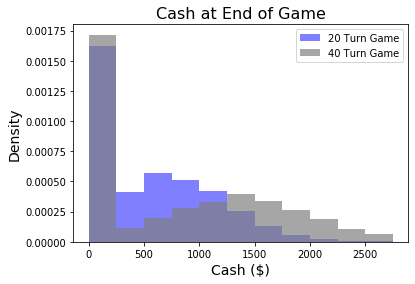

In [100]:
cash_20 = []
cash_40 = []
for i in range(0,5000):
    state = 0
    cash = 200
    for j in range(0,20):
        if cash != 0:
            state, cash = miniopoly_turn(state, cash, bonus=500)
    cash_20.append(cash)
for i in range(0,5000):
    state = 0
    cash = 200
    for j in range(0,40):
        if cash != 0:
            state, cash = miniopoly_turn(state, cash, bonus=500)
    cash_40.append(cash)

my_bins = range(0,3000, 250)
plt.hist(cash_20, bins=my_bins, alpha = 0.5, density = 1, stacked=True, color = "blue")
plt.hist(cash_40, bins=my_bins, alpha = 0.7, density = 1, stacked=True, color = "gray")
plt.title('Cash at End of Game', fontsize=16)
plt.xlabel('Cash ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(['20 Turn Game', '40 Turn Game'])

**Part C**: Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in the 60 turns. Simulate at least 10,000 games.

In [102]:
count = 0
for i in range(0,10000):
    state = 0
    cash = 200
    for j in range(0,60):
        if cash != 0:
            state, cash = miniopoly_turn(state, cash, bonus=500)
    if cash == 0:
        count = count + 1
prob = count/10000
print(prob)

0.4124


**Part D**:  Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in a 60 turn game  _given_ that they have been to **Jail** at least twice and never won a **Lottery**.  Is a player more or less likely to go bankrupt if they've been to jail twice and never won a **Lottery**? Simulate at least 10,000 games.

NOTE: If a player is already in jail and failed to roll a double, she will remain in Jail, which would increase the number of time she has been to jail by one.

In [105]:
count = 0
count_jail = 0
total = 0
for i in range(0,10000):
    state = 0
    cash = 200
    lot = False
    for j in range(0,60):
        if cash != 0:
            state, cash = miniopoly_turn(state, cash, bonus=500)
            if state == 20:
                lot = True
            if state == 30:
                count_jail = count_jail + 1
    if count_jail >= 2 and lot == False:
        total = total + 1
    if cash == 0 and count_jail >= 2 and lot == False:
        count = count + 1
prob = count/total
print(prob)

0.8191489361702128


***


### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1. 

**Part A**:  Compute $P(C)$ by hand. 


**Solution:** P(C) = (3*6) / (6*6) = 



**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [12]:
def prob():
    count = 0
    for i in range(0, 10000):
        a = np.random.randint(1, 7)
        b = np.random.randint(1, 7)
        if a==b or a-b==1 or b-a==1:
            count = count + 1
    print(count/10000)
prob()

0.432


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

P(c) =  0.443712


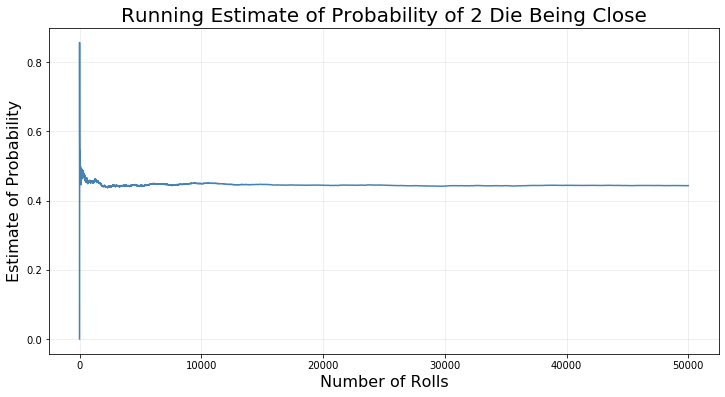

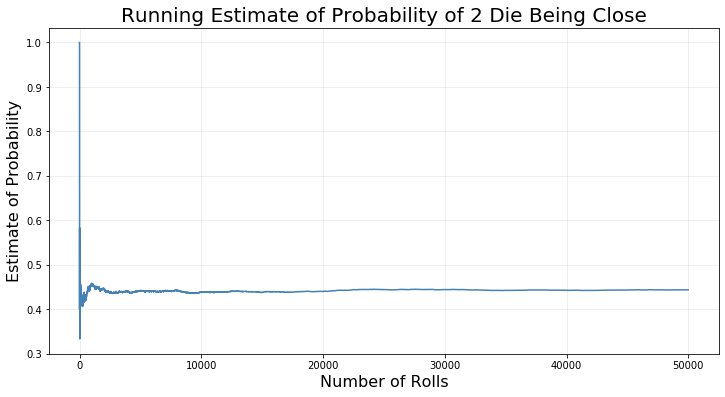

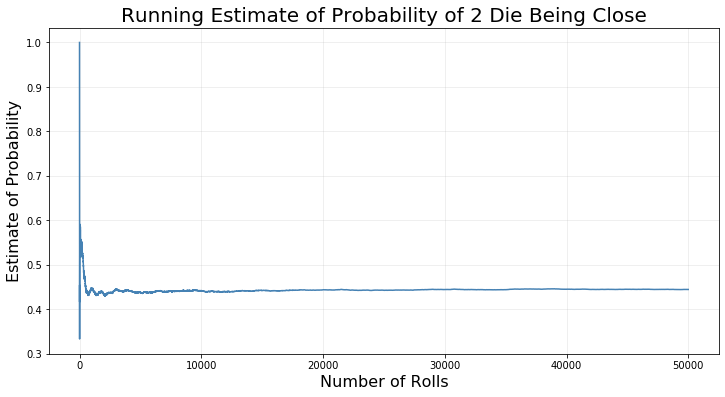

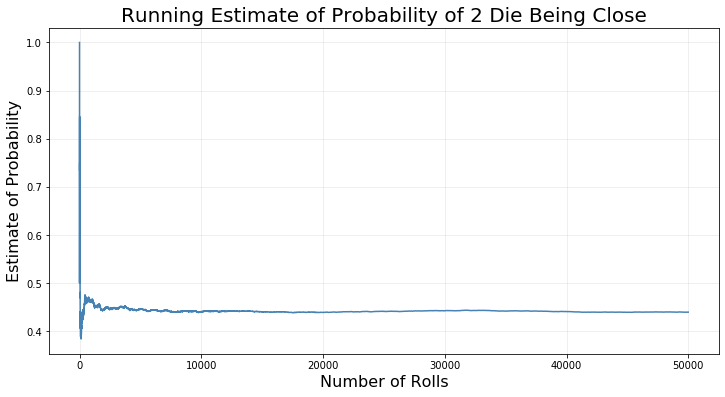

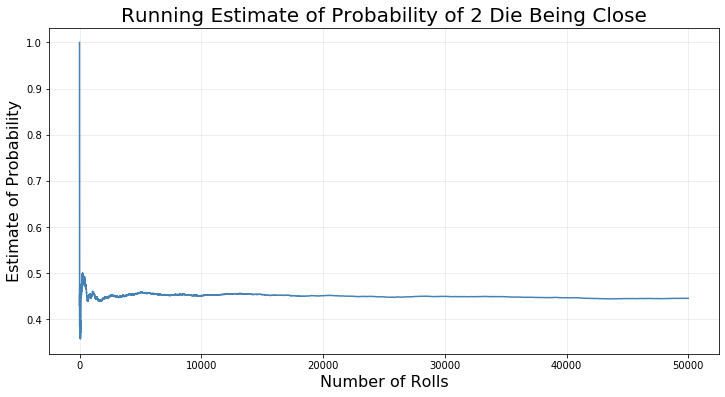

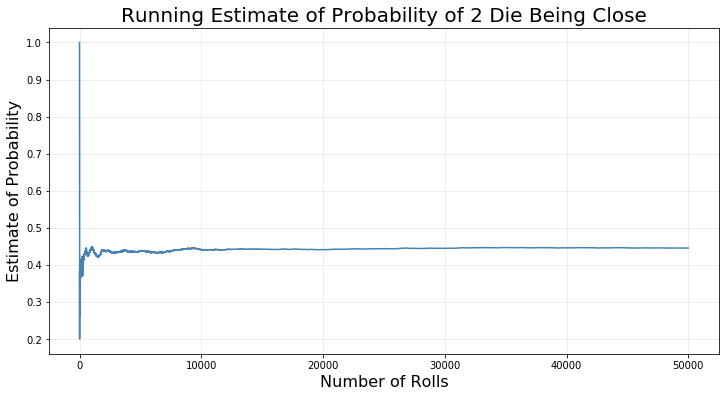

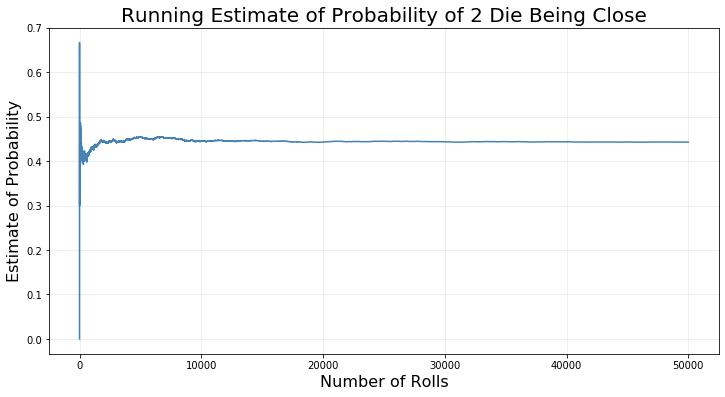

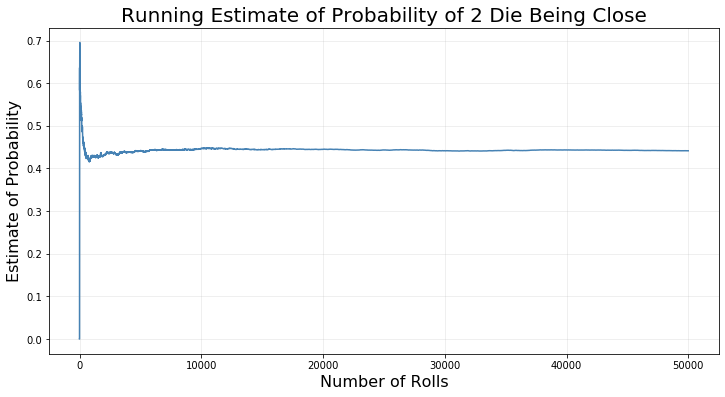

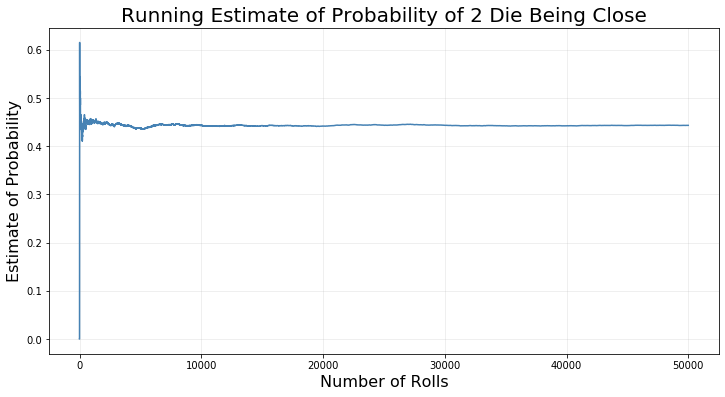

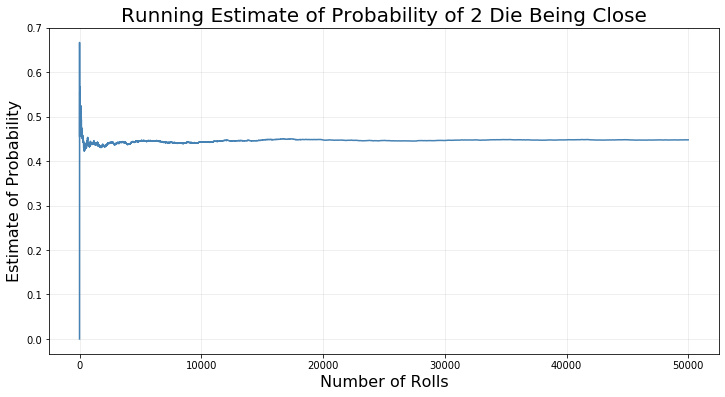

In [16]:
def computePc():
    count = 0
    total_count = 0
    total_prob = 0
    p = np.zeros(50000)
    for i in range(0, 50000):
        a = np.random.randint(1, 7)
        b = np.random.randint(1, 7)
        if a==b or a-b==1 or b-a==1:
            count = count + 1
        total_count = total_count + 1
        p[i] = count / total_count
    total_prob = count / total_count

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(p, color="steelblue")
    ax.set_title("Running Estimate of Probability of 2 Die Being Close", fontsize=20)
    ax.set_xlabel("Number of Rolls", fontsize=16)
    ax.set_ylabel("Estimate of Probability", fontsize=16)
    ax.grid(True, alpha=0.25)
    
    return total_prob

prob_sum = 0
for i in range(0, 10):
    prob_trial = computePc()
    prob_sum = prob_sum + prob_trial
Pc = prob_sum / 10
print("P(c) = ", Pc)

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

**Solution:** All of the trials ended up leveling out at the same point at around .45. The only uniqueness in trials is seen within the first initial rolls where each new roll makes big substantial changes to probability. The average of 10 tests at 50,000 trials each was P(c) =  0.443712